# Model 2
For the second model, let's use keras with tensorflow to model the data with a neural network

Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [28]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import model_to_dot

import numpy as np
import pandas as pd
from scipy import stats

from sklearn import model_selection
from sklearn import metrics
import tensorflow as tf

np.random.seed(42)
random_state = 42
from IPython.display import SVG

import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [85]:
X = np.loadtxt("data/train.csv", delimiter=",", skiprows=1) # skip first row which is the column labels 
y = np.loadtxt("data/train_y.csv", delimiter=",", skiprows=0)

In [86]:
X.shape

(39199, 133)

In [87]:
y.shape

(39199,)

In [88]:
y_df = pd.DataFrame(y)
y_df[0].value_counts()

0.0    31318
1.0     7881
Name: 0, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=random_state)

## Baseline Model

**Keras w/AUC Metric**

In [90]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [91]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [92]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])

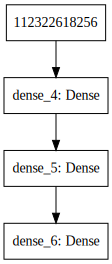

In [93]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [107]:
# Fit the model
history = model.fit(X_train, y_train, epochs=15, batch_size=10)

Epoch 1/15
29399/29399 [==============================] - 4s 138us/step - loss: 0.0849 - acc: 0.9752 - auc: 0.9512
Epoch 2/15
29399/29399 [==============================] - 4s 142us/step - loss: 0.0794 - acc: 0.9772 - auc: 0.9545
Epoch 3/15
29399/29399 [==============================] - 4s 143us/step - loss: 0.0788 - acc: 0.9775 - auc: 0.9573
Epoch 4/15
29399/29399 [==============================] - 4s 144us/step - loss: 0.0756 - acc: 0.9788 - auc: 0.9597
Epoch 5/15
29399/29399 [==============================] - 4s 146us/step - loss: 0.0735 - acc: 0.9797 - auc: 0.9618
Epoch 6/15
29399/29399 [==============================] - 4s 151us/step - loss: 0.0721 - acc: 0.9807 - auc: 0.9637
Epoch 7/15
29399/29399 [==============================] - 4s 144us/step - loss: 0.0715 - acc: 0.9804 - auc: 0.9653
Epoch 8/15
29399/29399 [==============================] - 4s 141us/step - loss: 0.0697 - acc: 0.9814 - auc: 0.9667
Epoch 9/15
29399/29399 [==============================] - 4s 141us/step - loss: 

In [194]:
trace0 = go.Scatter(
    x = [x for x in range(len(history.history['acc']))],
    y = history.history['acc'],
    mode = 'lines+markers',
    name = 'Accuracy'
)
trace1 = go.Scatter(
    x = [x for x in range(len(history.history['loss']))],
    y = history.history['loss'],
    mode = 'lines+markers',
    name = 'Loss'
)
trace2 = go.Scatter(
    x = [x for x in range(len(history.history['auc']))],
    y = history.history['loss'],
    mode = 'lines+markers',
    name = 'AUC'
)

data = [trace0, trace1, trace2]

iplot(data)

In [109]:
model.metrics_names

['loss', 'acc', 'auc']

In [110]:
# evaluate the model - Accuracy
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9800/9800 [==============================] - 0s 32us/step

acc: 97.93%


In [220]:
# evaluate the model - AUC
scores = model.evaluate(X_test, y_test)
auc_score = scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[2], auc_score))

9800/9800 [==============================] - 0s 36us/step

auc: 97.93%


In [196]:
y_pred = model.predict(X_test, verbose=1)

9800/9800 [==============================] - 0s 13us/step


In [197]:
y_pred_labels = model.predict_classes(X_test)

In [168]:
# Create a plot to show the predicted y probabilties and the y labels
num = 500

# predicted y probabilties
trace0 = go.Scatter(
    x = [x for x in range(num)],
    y = y_pred[:num].flatten(),
    mode = 'markers',
    name = 'predicted y probabilties'
)

# predicted y labels
trace1 = go.Scatter(
    x = [x for x in range(num)],
    y = y_pred_labels[:num].flatten(),
    mode = 'markers',
    name = 'predicted y labels'
)

# true y labels
trace2 = go.Scatter(
    x = [x for x in range(num)],
    y = y_test[:num].flatten(),
    mode = 'markers',
    name = 'true y labels'
)


data = [trace0, trace1, trace2]

fig = go.Figure(data=data, layout = {'title':'Y: Predicted Probabilties, Predicted Labels, and True Labels'})
iplot(fig)

In [198]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

In [224]:
# predicted y probabilties
trace0 = go.Scatter(
    x = fpr_keras,
    y = tpr_keras,
    mode = 'markers+lines',
    line=dict(color='darkorange', width=2),
    name = 'ROC Curve, (area = {})'.format(auc_score)
)

trace1 = go.Scatter(
    x=[0, 1], y=[0, 1], 
    mode='lines', 
    line=dict(color='navy', width=2, dash='dash'),
    showlegend=False)

data = [trace0, trace1]

fig = go.Figure(data=data, layout = {'title':'ROC Curve'})
iplot(fig)

### Predict Labels for Test Data

In [184]:
test = np.loadtxt("data/test.csv", delimiter=",", skiprows=1) # skip first row which is the column labels 

In [185]:
y_pred = model.predict(test, verbose=1)
y_pred_labels = model.predict_classes(test)

10000/10000 [==============================] - 0s 13us/step


In [186]:
y_pred.shape

(10000, 1)

In [187]:
# Create a plot to show the predicted y probabilties for the real test set
num = 500

# predicted y probabilties
trace0 = go.Scatter(
    x = [x for x in range(num)],
    y = y_pred[:num].flatten(),
    mode = 'markers',
    name = 'predicted y probabilties'
)

# predicted y labels
trace1 = go.Scatter(
    x = [x for x in range(num)],
    y = y_pred_labels[:num].flatten(),
    mode = 'markers',
    name = 'predicted y labels'
)

data = [trace0, trace1]

fig = go.Figure(data=data, layout = {'title':'Y: Predicted Probabilties, Predicted Labels for the Test Dataset'})
iplot(fig)

In [188]:
np.savetxt('data/results2.csv', y_pred.flatten(), delimiter=',')